## GÖRÜNTÜ ANALİZİ

Bilgisayar görmesi (computer vision), görsel verilerin içeriğini nasıl işleyeceğini, analiz edildiğini ve anladığını inceleyen bir alandır. 
Görüntü (içeriğinin) analizinde, görüntüdeki nesneler hakkındaki anlayışımızı oluşturmak için birçok bilgisayar görmesi algoritması kullanıyoruz. 

Bilgisayarla görme, nesne tanıma, şekil analizi, poz tahmini, 3D modelleme, görsel arama vb. gibi görüntü analizinin çeşitli yönlerini kapsar. 

İnsanlar çevrelerindeki şeyleri tanımlamak ve tanımakta gerçekten çok başarılılar! 

Bilgisayarlı görmenin asıl amacı, bilgisayarları kullanan insan görme sistemini doğru bir şekilde modellemektir.

Bilgisayar görmesi, çeşitli analiz seviyelerinden oluşur. Düşük seviyeli görmede, kenar algılama, morfolojik işleme ve optik akış gibi piksel işleme görevleriyle uğraşıyoruz.

Orta ve üst düzey görmede, nesne tanıma, 3B modelleme, hareket analizi ve görsel verilerin diğer çeşitli yönleriyle ilgileniyoruz. 

Yükseldikçe, görsel sistemimizin kavramsal yönlerini daha derine sokmaya ve etkinliklere ve niyetlere dayanarak görsel verilerin bir tanımını çıkarmaya çalışırız. 

Unutulmaması gereken bir şey, yüksek seviyelerin analiz için düşük seviyelerin çıktılarına dayanma eğiliminde olduğudur.

#### Buradaki en yaygın sorulardan biri şudur: Bilgisayarla görme, görüntü işlemeden nasıl farklıdır? 

Görüntü işleme, piksel düzeyinde görüntü dönüşümlerini inceler. Bir görüntü işleme sisteminin hem girişi hem de çıkışı görüntüdür. Bazı yaygın örnekler kenar algılama, histogram eşitleme ve görüntü sıkıştırmadır. 

Bilgisayarla görme algoritmaları, görevlerini yerine getirmek için görüntü işleme algoritmalarına büyük ölçüde dayanmaktadır. Bilgisayar görmesinde, görsel verileri kavramsal seviyede anlama içeren daha karmaşık şeylerle uğraşıyoruz.

Bunun nedeni, resimlerdeki nesnelerin anlamlı tanımlarını oluşturmak istememizdir.

https://www.rapidtables.com/web/color/RGB_Color.html.

# 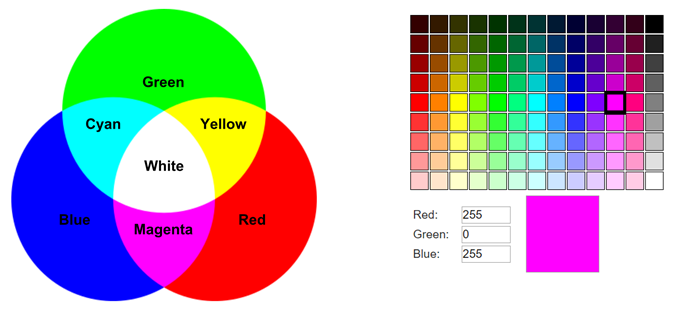

## Opencv ve Python ile Görüntü Analizi

Bu derste görüntüleri analiz etmek için Open Source Computer Vision Library (OpenCV) kütüphanesini kullanacağız. 4 temel işlem ile başlıyoruz: 

-Bir resmin görüntülenmesi ve yüklenmesi (displaying and loading)

-Bir resmin kesilmesi (cropping)

-Resmin yeniden boyutlandırılması (resizing)

-Resmin kaydedilmesi (saving)

# 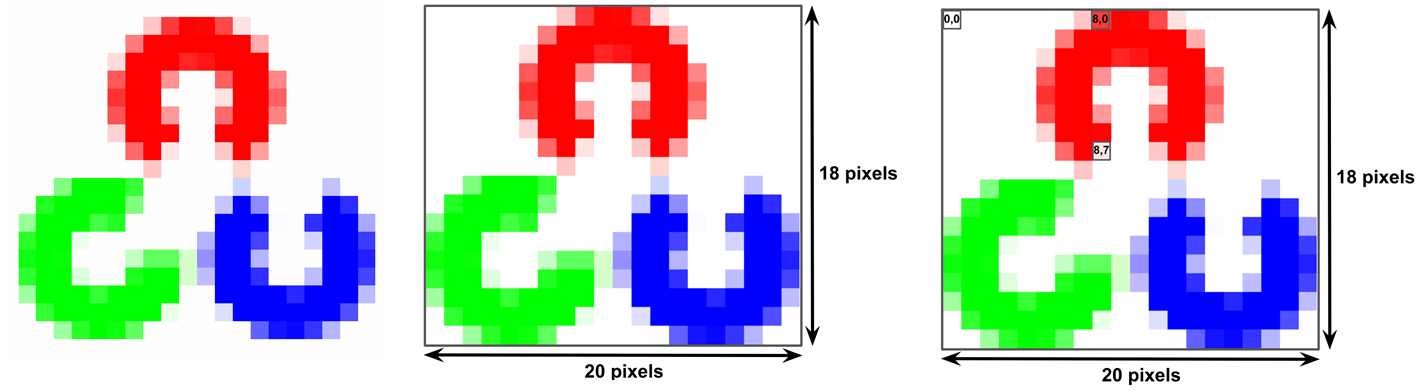

In [2]:
%matplotlib inline
import sys 
import cv2 
from matplotlib import pyplot as plt

In [4]:
#input_file = sys.argv[1]
input_file = "phuketkk.jpg"
img = cv2.imread(input_file)

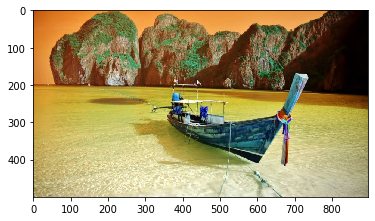

In [5]:
#cv2.imshow('Original', img)
plt.imshow(img)
plt.show()

In [7]:
dimension=img.shape
print(dimension)

(500, 897, 3)


In [9]:
total_number_of_elements= img.size
print(total_number_of_elements)

1345500


In [30]:
image_dtype = img.dtype

uint8


In [11]:
# A pixel value can be accessed by row and column coordinates.
# In case of BGR image, it returns an array of (Blue, Green, Red) values.
# Get the value of the pixel (x=40, y=6):
(b, g, r) = img[6, 40]
print(b,g,r)

212 108 25


In [12]:
img[6, 40] = (0, 0, 255)

In [15]:
# Cropping an image 
h, w = img.shape[:2] 
print(img.shape[:2])
start_row, end_row = int(0.21*h), int(0.73*h) 
start_col, end_col= int(0.37*w), int(0.92*w)
print(start_row, end_row, start_col, end_col)
img_cropped = img[start_row:end_row, start_col:end_col] 
print(img_cropped.shape[:2])

(500, 897)
105 365 331 825
(260, 494)


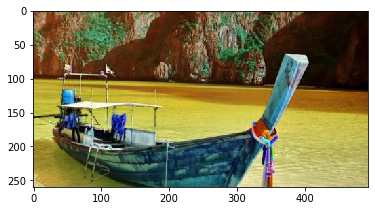

In [16]:
plt.imshow(img_cropped)
plt.show()

In [17]:
# Resizing an image 1.3 times
scaling_factor = 1.3 
img_scaled = cv2.resize(img, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_LINEAR) 

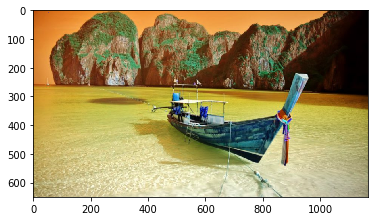

In [18]:
plt.imshow(img_scaled)
plt.show()

In [19]:
# Spesicific resize
img_scaled_2 = cv2.resize(img, (250, 400), interpolation=cv2.INTER_AREA) 

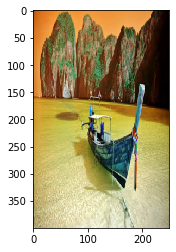

In [20]:
plt.imshow(img_scaled_2)
plt.show()

In [21]:
img_scaled_2.shape

(400, 250, 3)

In [24]:
output_file = input_file[:-4] + '_cropped.jpg' 
cv2.imwrite(output_file, img_cropped) 

True

In [24]:
import os

def resize_folder(in_folder, out_folder):
    list=os.listdir(in_folder)
    for l in list:
        if l.endswith(".jpg"):
            try:
                path=os.path.join(in_folder,os.path.basename(l))
                img = cv2.imread(path)
                img_scaled = cv2.resize(img, (50, 50), interpolation=cv2.INTER_AREA)
                out_path = os.path.join(out_folder, os.path.basename(l))
                cv2.imwrite(out_path, img_scaled)
            except():
                pass
    

In [26]:
from PIL import Image, ExifTags
from resizeimage import resizeimage

def resize2_folder(in_folder, out_folder):
    list = os.listdir(in_folder)
    for l in list:
        if l.endswith(".jpg"):
            try:
                path = os.path.join(in_folder, os.path.basename(l))
                img = Image.open(path)
                img_scaled = resizeimage.resize_cover(img, [50, 50])
                out_path = os.path.join(out_folder, os.path.basename(l))
                img_scaled.save(out_path)
            except ():
                pass

In [25]:
resize_folder("./images", "./resized")

In [27]:
resize2_folder("./images", "./resized2")